# Baseline logistic regression model vs. sklearn/sktime

In this notebook, I have seen how does the baseline logistic regression model performs, w.r.t different performance metrics, confusion metric, and classification report. Then we compare it wioth sklearn-based logistic regression and a well-studied TimeSeriesForestClassifier from the SKTIME library. I'm really not expecting it to perform great because logistic regression is idelally not suitable for time series data. 

In [1]:
# Load required dependencies. Here, data_util and LogisticRegression provides the feature extraction and logistic regression related functionalities. 

import os
import numpy as np
from pathlib import Path
from data_util import *
from lr import LogisticRegression as LR
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Baseline logistic regression model
Let's build the baseline logistic regression model on features extracted with pure numpy. 

### Step-1: Feature extraction from the uWaveGesture dataset 
The dataset had some unwanted files, e.g., 1.txt containing information such as "4-9: precision(11), sample frequency(100)".  However, according to dataset description, such files are unnecessary, therefore, I removed them keeping all the files named "[somePrefix]$gestureIndex-$repeatIndex.txt". Besides, I did some manual way of resturucturing the folders for gestures, gesture 1, gesture 2, ...., gesture 8, etc. My bad, perhaps that could be done in a automated way too. But anyway, sometimes we do things in a brute-force way so ;) Even I wrote another script for data download and extraction of .rar files. Please see naive_data_prep.py for more detail.

In [2]:
BASE_PATH = '/home/karim/Interviews/Celonis/data/structured'
gesture_1 = extract_gesture(BASE_PATH + '/U1/')
gesture_2 = extract_gesture(BASE_PATH + '/U2/')
gesture_3 = extract_gesture(BASE_PATH + '/U3/')
gesture_4 = extract_gesture(BASE_PATH + '/U4/')
gesture_5 = extract_gesture(BASE_PATH + '/U5/')
gesture_6 = extract_gesture(BASE_PATH + '/U6/')
gesture_7 = extract_gesture(BASE_PATH + '/U7/')
gesture_8 = extract_gesture(BASE_PATH + '/U8/')

X, y = create_dataset([gesture_1, gesture_2, gesture_3, gesture_4, gesture_5, gesture_6, gesture_7, gesture_8], shuffle=True)
print(X.shape, y.shape)

<generator object Path.rglob at 0x7f39bf3d8e40>
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-3.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration8-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration8-8.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-8.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration5-5.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration2-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration7-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration2-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_A

/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration5-6.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration2-4.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration8-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration2-8.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration5-10.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration5-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration6-4.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration7-10.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration4-6.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration2-1.txt
/home/karim/Interviews/Celonis

/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-3.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration6-2.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration2-8.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration2-6.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration6-3.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration1-9.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration4-2.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration5-1.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration8-2.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration6-5.txt
/home/karim/Interviews/Celonis/d

/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-1.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration7-3.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration1-9.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-4.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration1-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration8-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-3.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration3-9.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration4-4.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration3-2.txt
/home/karim/Interviews/Celonis/d

/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration2-9.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration2-8.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-2.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-4.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration5-3.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-6.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration8-1.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration1-9.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration3-5.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration3-10.txt
/home/karim/Interviews/Celonis/

Let's create a time series data by stacking the samples of all the gestures (total 4,480 samples) side by side, such that:

    - The dimension of each sample is (n_samples, 3 * n_features) = (4480, 942), where  
    - Number of features = 314 * 3 = 942
    - Number of n_samples = len(gesture) * 8 = 560 * 8 = 4480.

### Step-2: prepare training and test sets
We use 70% of the data for the training and 30% for testing the trained model.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step-3: Building logistic regression model
We build the baseline logistic regression model. 

In [4]:
lr = LR(n_iter = 5000)  
lr.fit(X_train, y_train, batch_size=64, lr=0.001, verbose=True)
lr.score(X_train, y_train)

 Training accuray at 0 iterations is 0.23118622448979592
 Training accuray at 1000 iterations is 0.5813137755102041
 Training accuray at 2000 iterations is 0.5905612244897959
 Training accuray at 3000 iterations is 0.6017219387755102
 Training accuray at 4000 iterations is 0.6029974489795918


0.6211734693877551

### Step-4: Monitor losses
Let's check how the model's training loss convergences with iterations. 

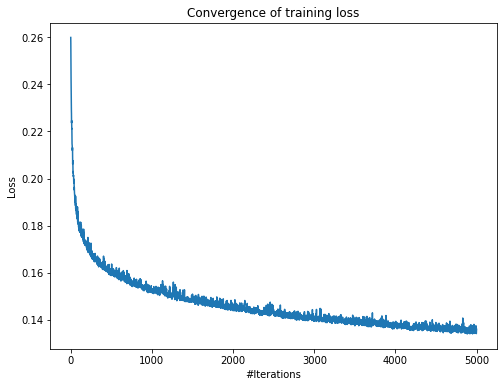

In [5]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Convergence of training loss")
plt.xlabel("#Iterations")
plt.ylabel("Loss")
plt.show()

We can see that the loss indeed decreases over the iteration, this means training for more iteration could further help reduce the training loss. 

### Step-5: Model evaluation
Let's check how the model' performs on test set.  

In [6]:
y_pred = lr.predict_classes(X_test) 
accuracy_score(y_test, y_pred)

0.5461309523809523

A decrease of the testing loss of 7% is a sign of potential overfitting - a phenomena for the which the LR model didn't work well on unseen data. Perhaps adding regularization techniques could help. or perhaps shuffling the data ....!

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 65  11   9  25   2  17  12  26]
 [  3  92   1  22  20  15   2   5]
 [  5   2  72   8   8  16  11  54]
 [ 18   5  12  59  13  25   8  21]
 [  2  10   7  11 125  18   7   7]
 [  7  25   2   5  26  61  18   7]
 [  2   2   6   3   3   3 137  13]
 [  5   0  15   5   7   3  15 123]]


We can see the model was pretty much confused at correctly recognising different gesture signals. To further diagnose the reason, let's see the class-wise classsificatin report. 

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47       167
           1       0.63      0.57      0.60       160
           2       0.58      0.41      0.48       176
           3       0.43      0.37      0.39       161
           4       0.61      0.67      0.64       187
           5       0.39      0.40      0.39       151
           6       0.65      0.81      0.72       169
           7       0.48      0.71      0.57       173

    accuracy                           0.55      1344
   macro avg       0.55      0.54      0.53      1344
weighted avg       0.55      0.55      0.54      1344



From the class-wise classsificatin report, it is clear the model is no better than ramdom at correctly recognising different gesture signals except for class 1, 4, 6, and 7. 

## Logistic regression from sklearn
Let's try the multinominal logistic regression from the sklearn library. 

In [9]:
lr_sk = LogisticRegression(multi_class='multinomial', max_iter=5000)
lr_sk.fit(X_train, y_train)
lr_sk.score(X_train, y_train)

0.6954719387755102

In [10]:
y_pred = lr_sk.predict(X_test) 

In [11]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

(0.5463951271027961, 0.5453869047619048, 0.5443061687546544, None)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 92   7  10  16   1  16  10  15]
 [ 10  87   3  21  18  18   0   3]
 [ 11   4  84   6   6  17   7  41]
 [ 30   6  12  60   7  28   8  10]
 [  6   9   8  13 117  19   9   6]
 [ 11  22   4  12  24  62  12   4]
 [  7   6   6   2   3   9 127   9]
 [ 17   2  29   4   4   2  11 104]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       167
           1       0.61      0.54      0.57       160
           2       0.54      0.48      0.51       176
           3       0.45      0.37      0.41       161
           4       0.65      0.63      0.64       187
           5       0.36      0.41      0.39       151
           6       0.69      0.75      0.72       169
           7       0.54      0.60      0.57       173

    accuracy                           0.55      1344
   macro avg       0.54      0.54      0.54      1344
weighted avg       0.55      0.55      0.54      1344



Yielding an f1 score of 54% made the sklearn-based logistic regression classifier is comparable of the baseline implementation of my numpy implementation of logistic regression. 

## Classification with TimeSeriesForestClassifier from SKTIME libarary
Now that none of these two classifiers are no good than random, let's try to do the clasifcation using the time series forecast classifier from the SKTIME library (https://github.com/alan-turing-institute/sktime). This will give us an indication if we should try out with other libraries or models. 

THe sktime is a library for time series analysis in Python. It provides a unified interface for multiple time series learning tasks. Currently, this includes time series classification, regression, clustering, annotation and forecasting. It comes with time series algorithms and scikit-learn compatible tools to build, tune, and validate time series models. 

In [14]:
tc = TimeSeriesForestClassifier()
tc.fit(X_train, y_train)
y_pred = tc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9002976190476191

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[141   2   1   9   1   0   4   9]
 [  5 139   0   4   6   6   0   0]
 [  0   0 155   2   2   1   1  15]
 [ 11   0   1 137   2   5   1   4]
 [  0   2   1   4 173   6   1   0]
 [  0   3   1   2   2 142   1   0]
 [  3   0   3   1   3   0 157   2]
 [  1   0   3   1   0   0   2 166]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       167
           1       0.95      0.87      0.91       160
           2       0.94      0.88      0.91       176
           3       0.86      0.85      0.85       161
           4       0.92      0.93      0.92       187
           5       0.89      0.94      0.91       151
           6       0.94      0.93      0.93       169
           7       0.85      0.96      0.90       173

    accuracy                           0.90      1344
   macro avg       0.90      0.90      0.90      1344
weighted avg       0.90      0.90      0.90      1344



In [19]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

(0.9020501999220608, 0.9002976190476191, 0.9002408032068555, None)


## Summary 
The TimeSeriesForestClassifier clearly outperforms both versions of the logistic regression, giving an indication that trying out with other libraries or models could further enhnce the classiifcation accuracy.